In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,  precision_score, recall_score, f1_score
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [13]:
train_data = pd.read_csv("Training.csv")  
train_data.head() 

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [14]:
train_data = train_data.drop(['Unnamed: 133'],axis=1)

In [15]:
train_data.shape

(4920, 133)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [17]:
train_data.describe().T

count      mean       std  min  25%  50%  75%  max
itching               4920.0  0.137805  0.344730  0.0  0.0  0.0  0.0  1.0
skin_rash             4920.0  0.159756  0.366417  0.0  0.0  0.0  0.0  1.0
nodal_skin_eruptions  4920.0  0.021951  0.146539  0.0  0.0  0.0  0.0  1.0
continuous_sneezing   4920.0  0.045122  0.207593  0.0  0.0  0.0  0.0  1.0
shivering             4920.0  0.021951  0.146539  0.0  0.0  0.0  0.0  1.0
...                      ...       ...       ...  ...  ...  ...  ...  ...
small_dents_in_nails  4920.0  0.023171  0.150461  0.0  0.0  0.0  0.0  1.0
inflammatory_nails    4920.0  0.023171  0.150461  0.0  0.0  0.0  0.0  1.0
blister               4920.0  0.023171  0.150461  0.0  0.0  0.0  0.0  1.0
red_sore_around_nose  4920.0  0.023171  0.150461  0.0  0.0  0.0  0.0  1.0
yellow_crust_ooze     4920.0  0.023171  0.150461  0.0  0.0  0.0  0.0  1.0

[132 rows x 8 columns]

In [18]:
train_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [19]:
copy = train_data.copy()
copy = copy.drop(['prognosis'],axis=1)

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(150, 150))
sns.heatmap(copy.corr(),annot=True,fmt = ".2f",cmap='magma')
plt.show()

In [26]:
X_train = train_data.drop(["prognosis"], axis = 1)  
y_train = train_data["prognosis"] 

In [27]:
scale=MinMaxScaler()
scale.fit(X_train)

MinMaxScaler()

In [29]:
test_data = pd.read_csv('Testing.csv')
test_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [30]:
X_test = test_data.drop(["prognosis"], axis = 1)  
y_test = test_data["prognosis"] 

In [31]:
scale2=MinMaxScaler()
scale2.fit(X_test)

MinMaxScaler()

In [32]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [33]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [34]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confution matrix for model " f'{best_model_knn} : \n',cm_knn)
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Confution matrix for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy score for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) :  1.0
classification_report for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma      

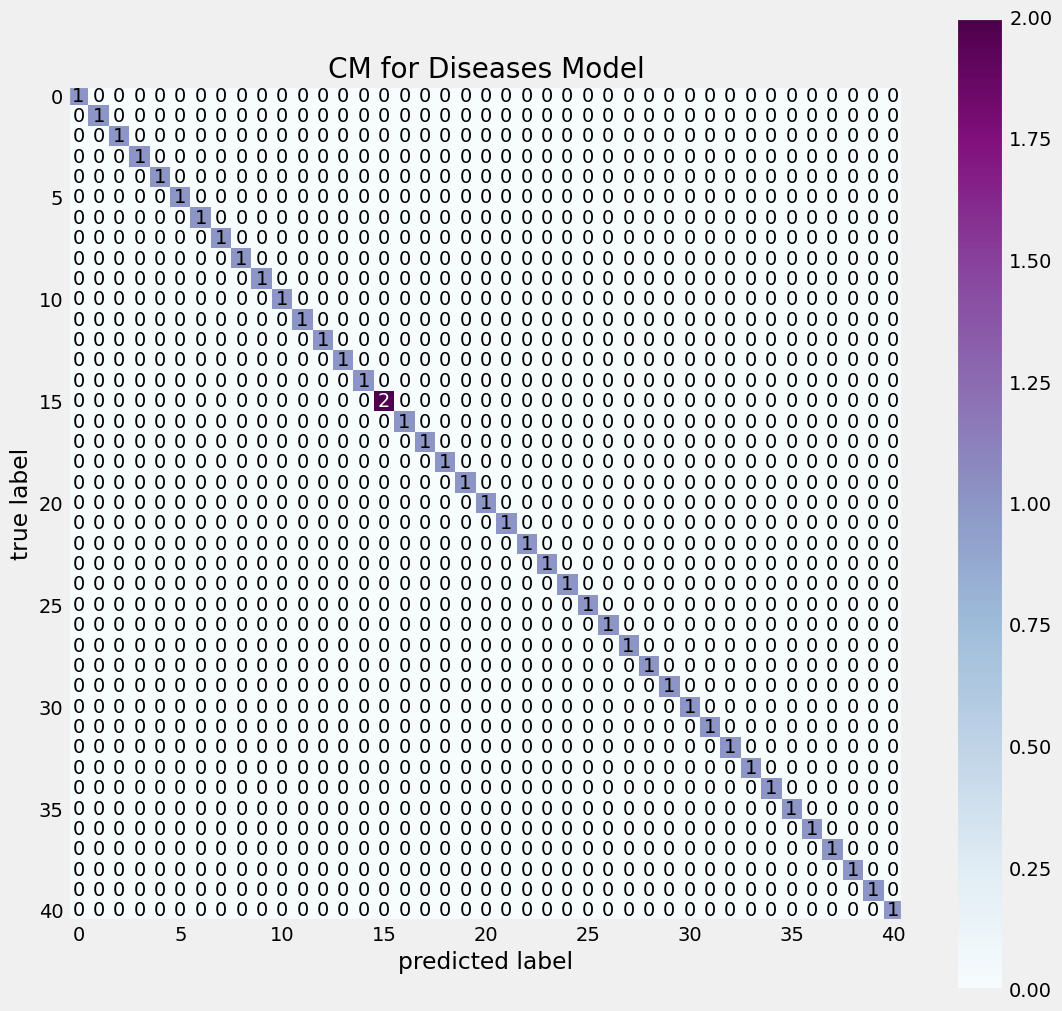

In [37]:
cm_rnf = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='BuPu',
                               figsize=(12, 12))
plt.title("CM for Diseases Model")
plt.show()

In [38]:
print(best_model_knn.score(X_train,y_train))

1.0


In [39]:
print(best_model_knn.score(X_test,y_test))

1.0
